# Crop file to specified boundaries
This notebook crops the file from [Open Buildings](https://sites.research.google/open-buildings/#download) to the bounds using the provided geojson file.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

/opt/anaconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/var/folders/lt/_vxm7m7x0hs2v8mx_0zxl5vc0000gn/T/ipykernel_16853/3833191812.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (htt

## 1. Download and extract building files
Download data inside the cell containing Rizal province [here](https://storage.googleapis.com/open-buildings-data/v2/polygons_s2_level_4_gzip/339_buildings.csv.gz)

Please extract the file in the `data/` folder
The filename should be `339_buildings.csv`


## 2. Read bounds
Read Rizal boundaries geojson

<Axes: >

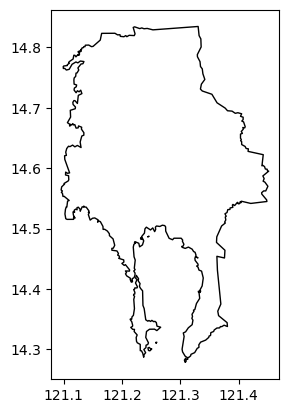

In [2]:
bounds = gpd.read_file("../data/rizal.geojson")
bounds.plot(facecolor="none")

## 3. Read buildings
Read the extracted building polygons file

In [3]:
buildings = pd.read_csv("../data/339_buildings.csv", engine="c")
print(f"Read {len(buildings):,} records.")

Read 14,042,826 records.


In [4]:
buildings['geometry'] = gpd.GeoSeries.from_wkt(buildings['geometry'] )
buildings_gdf = gpd.GeoDataFrame(buildings, geometry='geometry')
proj_crs = "4326"
buildings_gdf = buildings_gdf.set_crs(proj_crs)
buildings_gdf.head()


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,14.537621,121.110581,43.9186,0.8324,"POLYGON ((121.11061 14.53765, 121.11057 14.537...",7Q63G4Q6+26WW
1,14.892813,120.538926,95.7626,0.7994,"POLYGON ((120.53898 14.89280, 120.53896 14.892...",7Q62VGVQ+4HFG
2,14.414952,120.847041,7.1470,0.6178,"POLYGON ((120.84706 14.41496, 120.84702 14.414...",7Q62CR7W+XRM3
3,16.413239,120.584556,48.9282,0.6295,"POLYGON ((120.58460 16.41322, 120.58459 16.413...",7Q82CH7M+7RVH
4,14.896263,120.766815,263.6622,0.8070,"POLYGON ((120.76690 14.89634, 120.76680 14.896...",7Q62VQW8+GP4C


In [5]:
# If above cell runs slow, uncomment and try the following code
# Intersect is faster using the centroid instead of the polygon
# Merge with original dataframe after then save

In [6]:
# usecols=['latitude', 'longitude', 'area_in_meters', 'confidence','full_plus_code']

# buildings_gdf = gpd.GeoDataFrame(
#     buildings[usecols], geometry=gpd.points_from_xy(buildings['longitude'],\
#                                                  buildings['latitude']))
# proj_crs = "4326"
# buildings_gdf = buildings_gdf.set_crs(proj_crs)
#buildings_gdf.head()

## Get intersection

In [7]:
rizal_buildings = bounds[['geometry']].overlay(buildings_gdf,\
                                               how="intersection",\
                                               keep_geom_type=False)
print(f"Retained {len(rizal_buildings):,} records.")

Retained 742,539 records.


In [8]:
rizal_buildings.head()

,latitude,longitude,area_in_meters,confidence,full_plus_code,geometry
0,14.537621,121.110581,43.9186,0.8324,7Q63G4Q6+26WW,"POLYGON ((121.11059 14.53758, 121.11055 14.537..."
1,14.753431,121.138113,32.7564,0.6051,7Q63Q43Q+96H8,"POLYGON ((121.13815 14.75339, 121.13806 14.753..."
2,14.532918,121.163196,19.8461,0.6037,7Q63G5M7+578M,"POLYGON ((121.16320 14.53289, 121.16317 14.532..."
3,14.590740,121.182893,445.2835,0.8213,7Q63H5RM+75RG,"POLYGON ((121.18291 14.59061, 121.18289 14.590..."
4,14.609343,121.107028,7.5872,0.6710,7Q63J454+PRJQ,"POLYGON ((121.10702 14.60933, 121.10702 14.609..."


## Save file
Save cropped data as geojson

In [9]:
rizal_buildings.to_file("../data/rizal_buildings.geojson")